### Objective:

'''In this assignment students need to predict whether a person makes over 50K per year or not from classic adult dataset using XGBoost. The description of the dataset is as follows:

Data Set Information: Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Attribute Information: Listing of attributes:

50K, <=50K. age: continuous. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. fnlwgt: continuous. education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof- specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing,

Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. sex: Female, Male. capital-gain: continuous. capital-loss: continuous. hours-per-week: continuous. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.'''

In [2]:
#Following is the code to load required libraries and data: 

%matplotlib inline 
import pandas as pd # for Data analysis using pandas
import numpy as np # for numerical opeartions using numpy
import matplotlib.pyplot as plt # for graphical representation of data using matplotlib
import seaborn as sns  # for graphical representation of data using Seaborn


In [3]:
# Load python modules for machine learning algorithm
from xgboost.sklearn import XGBClassifier  
from sklearn.model_selection import train_test_split
from xgboost import plot_tree , plot_importance 
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix , precision_score, recall_score , f1_score

In [4]:
#Loading Dataset
df_AdultData_train_set = pd.read_csv('data/adult.data', header = None)
df_AdultData_test_set = pd.read_csv('data/adult.test', skiprows = 1, header = None)

In [5]:
# Apply columns name into dataframe
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status','occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week',
'native_country', 'wage_class']
df_AdultData_train_set.columns=col_labels
df_AdultData_test_set.columns=col_labels

In [6]:
# Sample rows of training data
df_AdultData_train_set.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [7]:
# Sample rows of training data
df_AdultData_test_set.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.


<b> Listing of attributes:</b>
* <b>wage_class</b> : >50K, <=50K.
* <b>age</b>: continuous.
* <b>workclass</b>: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov,Without-pay, Never-worked.
* <b>fnlwgt</b>: continuous.
* <b>education</b>: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc,9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* <b>education-num</b>: continuous.
* <b>marital-status</b>: Married-civ-spouse, Divorced, Never-married, Separated, Widowed,Married-spouse-absent, Married-AF-spouse.
* <b>occupation</b>: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Profspecialty,Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing,Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* <b>relationship</b>: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* <b>race</b>: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* <b>sex</b>: Female, Male.
* <b>capital-gain</b>: continuous.
* <b>capital-loss</b>: continuous.
* <b>hours-per-week</b>: continuous.
* <b>native-country</b>: United-States, Cambodia, England, Puerto-Rico, Canada, Germany,Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras,Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France,Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala,Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong,Holand-Netherlands.

In [8]:
#Statistical and Descriptive Analysis of Training and Test Data set

#get na values in dataset
def get_NA_values(df):
    ''' This function will return sum of NA values in dataset'''
    sum_na =df.isna().sum().sum()
    return sum_na
    
print("NULL/NA values in training dataset :",get_NA_values(df_AdultData_train_set))
print("NULL/NA values in test dataset :",get_NA_values(df_AdultData_test_set))

NULL/NA values in training dataset : 0
NULL/NA values in test dataset : 0


In [9]:
# get shape of dataset

# function to get shape of dataset
def get_shape_of_dataset(df):
    shape_data="Number Of rows in dataset : {0} and Number Of columns in dataset : {1}" .format(df.shape[0] , df.shape[1])
    return shape_data
                                                                                       
print("For Training dataset\n",get_shape_of_dataset(df_AdultData_train_set))  
print("For Test dataset\n",get_shape_of_dataset(df_AdultData_test_set))
                                                                                                                                                

For Training dataset
 Number Of rows in dataset : 32561 and Number Of columns in dataset : 15
For Test dataset
 Number Of rows in dataset : 16281 and Number Of columns in dataset : 15


In [10]:
# get Datatype and column information of dataset

# function to datatype and column information of dataset
def get_info_of_data(df):
    info=df.info()
    return info

print("Datatype and column information about Training data \n")
print(get_info_of_data(df_AdultData_train_set),"\n")
print("Datatype and column information about Test data \n")
print(get_info_of_data(df_AdultData_test_set))


Datatype and column information about Training data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
wage_class        32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None 

Datatype and column information about Test data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
age               16281 non

In [11]:
# get Statistical distribution of dataset
# describe() return numerical stats about data

pd.options.display.float_format = "{:.3f}".format # prnt values till 3 decimal places
def get_stats_of_data(df):
    stats= df.describe()
    return stats

#Statistical analysis of training data
get_stats_of_data(df_AdultData_train_set)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000,32561.000,32561.000,32561.000,32561.000,32561.000
mean,38.582,189778.367,10.081,1077.649,87.304,40.437
std,13.640,105549.978,2.573,7385.292,402.960,12.347
min,17.000,12285.000,1.000,0.000,0.000,1.000
25%,28.000,117827.000,9.000,0.000,0.000,40.000
50%,37.000,178356.000,10.000,0.000,0.000,40.000
75%,48.000,237051.000,12.000,0.000,0.000,45.000
max,90.000,1484705.000,16.000,99999.000,4356.000,99.000


In [12]:
#Statistical analysis of test data
get_stats_of_data(df_AdultData_test_set)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,16281.000,16281.000,16281.000,16281.000,16281.000,16281.000
mean,38.767,189435.678,10.073,1081.905,87.899,40.392
std,13.849,105714.908,2.568,7583.936,403.105,12.479
min,17.000,13492.000,1.000,0.000,0.000,1.000
25%,28.000,116736.000,9.000,0.000,0.000,40.000
50%,37.000,177831.000,10.000,0.000,0.000,40.000
75%,48.000,238384.000,12.000,0.000,0.000,45.000
max,90.000,1490400.000,16.000,99999.000,3770.000,99.000


In [13]:
# Descriptive Stats about  String type data
def get_stats_of_string_type_data(df):
    descriptive_stats=df.describe(include=[np.object]) # np.object for object type data
    return descriptive_stats

#Descriptive statistical analysis of training data
get_stats_of_string_type_data(df_AdultData_train_set)

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,wage_class
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [14]:
#Descriptive statistical analysis of test data
get_stats_of_string_type_data(df_AdultData_test_set)

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,wage_class
count,16281,16281,16281,16281,16281,16281,16281,16281,16281
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K.
freq,11210,5283,7403,2032,6523,13946,10860,14662,12435


In [15]:
# trim white space from dataframe cells
def trim_whiteSpace(df):
    df=df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)  
    return df

df_AdultData_test_set = trim_whiteSpace(df_AdultData_test_set)
df_AdultData_train_set = trim_whiteSpace(df_AdultData_train_set)

In [16]:
# Check duplicate data in Dataset

def check_duplictes_value_in_data(df):
    is_duplicate=df.duplicated().any()
    dupluicate_count=df.duplicated().sum()
    return is_duplicate , dupluicate_count

print("In Training dataset\n Is dataset having duplicate values :{0} , Total duplicates values in dataset:{1}".format(check_duplictes_value_in_data(df_AdultData_train_set)[0] ,check_duplictes_value_in_data(df_AdultData_train_set)[1] ))
print("In Test dataset\n Is dataset having duplicate values :{0} , Total duplicates values in dataset:{1}".format(check_duplictes_value_in_data(df_AdultData_test_set)[0] ,check_duplictes_value_in_data(df_AdultData_test_set)[1] ))


In Training dataset
 Is dataset having duplicate values :True , Total duplicates values in dataset:24
In Test dataset
 Is dataset having duplicate values :True , Total duplicates values in dataset:5


In [17]:
#Remove duplicate data
def remove_duplicate_in_dataset(df):
    df=df.drop_duplicates(keep='first')
    return df

df_AdultData_train_set=remove_duplicate_in_dataset(df_AdultData_train_set)
df_AdultData_test_set=remove_duplicate_in_dataset(df_AdultData_test_set)

print("In Training dataset\n Is dataset having duplicate values :{0} , Total duplicates values in dataset:{1}".format(check_duplictes_value_in_data(df_AdultData_train_set)[0] ,check_duplictes_value_in_data(df_AdultData_train_set)[1] ))
print("In Test dataset\n Is dataset having duplicate values :{0} , Total duplicates values in dataset:{1}".format(check_duplictes_value_in_data(df_AdultData_test_set)[0] ,check_duplictes_value_in_data(df_AdultData_test_set)[1] ),"\n")

# Checck for structure of data after duplicate rows removal
print("For Training dataset\n",get_shape_of_dataset(df_AdultData_train_set))  
print("For Test dataset\n",get_shape_of_dataset(df_AdultData_test_set))

In Training dataset
 Is dataset having duplicate values :False , Total duplicates values in dataset:0
In Test dataset
 Is dataset having duplicate values :False , Total duplicates values in dataset:0 

For Training dataset
 Number Of rows in dataset : 32537 and Number Of columns in dataset : 15
For Test dataset
 Number Of rows in dataset : 16276 and Number Of columns in dataset : 15


In [18]:
# Function to Get unique values of string(object) type data

def get_unique_values_for_stringtype_Data(df):
    for col in df.select_dtypes(include=[np.object]).columns:
        print(col , " :" , df[col].unique(),"\n")
        
get_unique_values_for_stringtype_Data(df_AdultData_train_set)    

workclass  : ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

education  : ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] 

marital_status  : ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed'] 

occupation  : ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv'] 

relationship  : ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative'] 

race  : ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other'] 

sex  : ['Male' 'Female'] 

native_country  : ['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puert

In [19]:
#The unique values in Test dataset
get_unique_values_for_stringtype_Data(df_AdultData_test_set)

workclass  : ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

education  : ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool'] 

marital_status  : ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse'] 

occupation  : ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces'] 

relationship  : ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative'] 

race  : ['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo'] 

sex  : ['Male' 'Female'] 

native_country  : ['United-States' '?' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'


In [20]:
#since both and train & test dataset containes some values with " ?", Which can cause error in prediction for wage earned by people mentioned in dataset.
#so we have to remove.

# drop the rows which contains ? from data cells
def drop_unneeded_values(df):
    df=df.replace('?', np.nan).dropna()
    return df

df_AdultData_train_set= drop_unneeded_values(df_AdultData_train_set)
df_AdultData_test_set= drop_unneeded_values(df_AdultData_test_set)

# Shape of data after removal of "?"
print("Training dataset\n",get_shape_of_dataset(df_AdultData_train_set))  
print("Test dataset\n",get_shape_of_dataset(df_AdultData_test_set))

Training dataset
 Number Of rows in dataset : 30139 and Number Of columns in dataset : 15
Test dataset
 Number Of rows in dataset : 15055 and Number Of columns in dataset : 15


In [21]:
# Update wage class variable 
print("Wage class variable in Training Dataset :" ,df_AdultData_train_set['wage_class'].unique())
print("Wage class variable in Test Dataset :", df_AdultData_test_set['wage_class'].unique())

Wage class variable in Training Dataset : ['<=50K' '>50K']
Wage class variable in Test Dataset : ['<=50K.' '>50K.']


In [22]:
#Update wage_class variable and replace  with older one
df_AdultData_test_set['wage_class']=df_AdultData_test_set['wage_class'].replace({'<=50K.': '<=50K', '>50K.':'>50K'})

In [23]:
#Sample rows fo training data
df_AdultData_train_set.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [24]:
#Sample rows fo test data
df_AdultData_test_set.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K


In [25]:
#Since both train and test dataset contain categorical data , for analysis replace string data with number using pandas categorical() method.

def convertCategorical(df):
    for col in df.columns:
        if df[col].dtype=='object':
            df[col]=pd.Categorical(df[col]).codes
    return df

# Replacing string data with code(numerical) value
df_AdultData_test_set =convertCategorical(df_AdultData_test_set)
df_AdultData_train_set =convertCategorical(df_AdultData_train_set)


#info of dataset after removing
print("Datatype and column information about Training data after change\n")
print(get_info_of_data(df_AdultData_train_set),"\n")
print("Datatype and column information about Test data after change \n")
print(get_info_of_data(df_AdultData_test_set))


Datatype and column information about Training data after change

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30139 entries, 0 to 32560
Data columns (total 15 columns):
age               30139 non-null int64
workclass         30139 non-null int8
fnlwgt            30139 non-null int64
education         30139 non-null int8
education_num     30139 non-null int64
marital_status    30139 non-null int8
occupation        30139 non-null int8
relationship      30139 non-null int8
race              30139 non-null int8
sex               30139 non-null int8
capital_gain      30139 non-null int64
capital_loss      30139 non-null int64
hours_per_week    30139 non-null int64
native_country    30139 non-null int8
wage_class        30139 non-null int8
dtypes: int64(6), int8(9)
memory usage: 1.9 MB
None 

Datatype and column information about Test data after change 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15055 entries, 0 to 16280
Data columns (total 15 columns):
age               15055

In [26]:
#Training dataSet
df_AdultData_train_set.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0


In [27]:
#Test dataSet
df_AdultData_test_set.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,37,0


In [28]:
# Basline Line accuracy with train and test data set for wage class
# Where 0 : represents that slary is less than-equal to 50K and 1 : represent salary is grater than 50K
print("Training Dataset")
df_AdultData_train_set['wage_class'].value_counts(normalize=True)

Training Dataset


0   0.751
1   0.249
Name: wage_class, dtype: float64

In [29]:
print("Test Dataset")
df_AdultData_test_set['wage_class'].value_counts(normalize=True)

Test Dataset


0   0.754
1   0.246
Name: wage_class, dtype: float64

In [30]:
print("We clearly see that, both training and test dataset 75% people have salary less than equal to 50K.")

We clearly see that, both training and test dataset 75% people have salary less than equal to 50K.


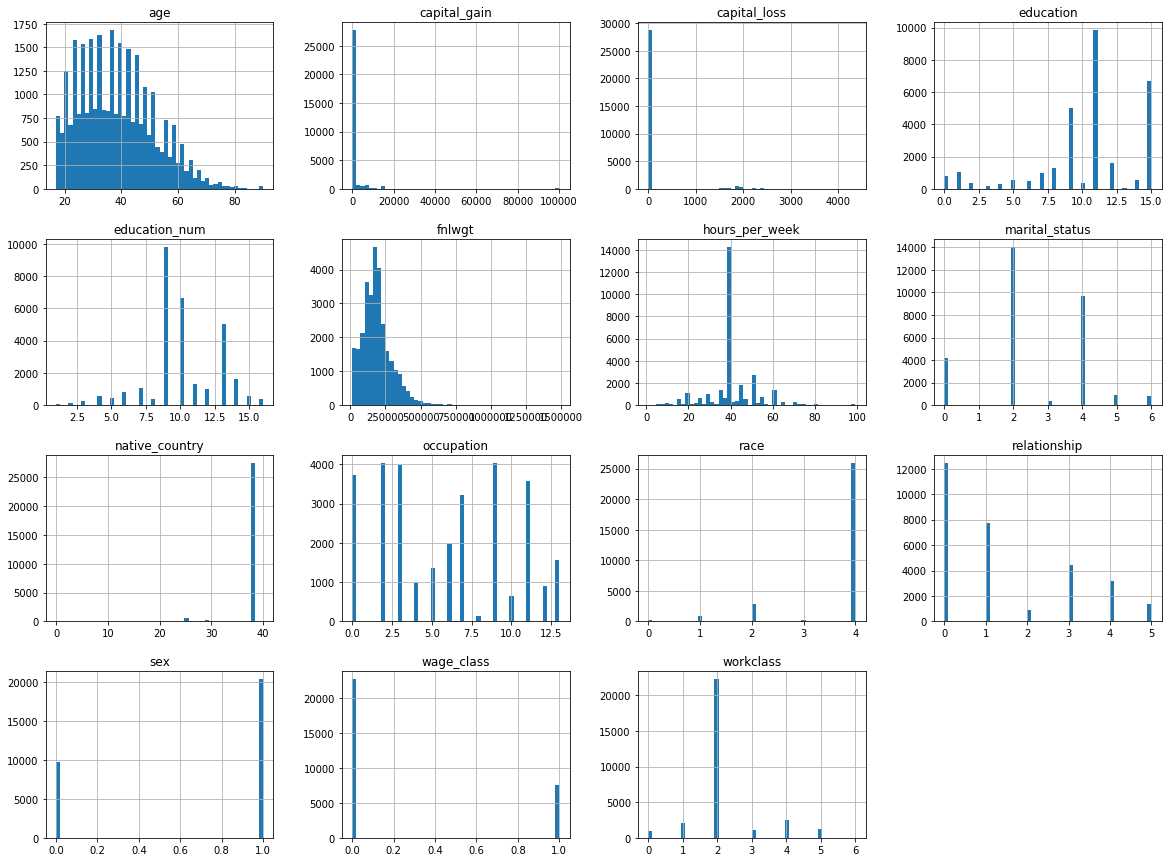

In [31]:
# Data Visualisation for Training Dataset for individual features
df_AdultData_train_set.hist(bins=50, figsize=(20,15))
plt.show()

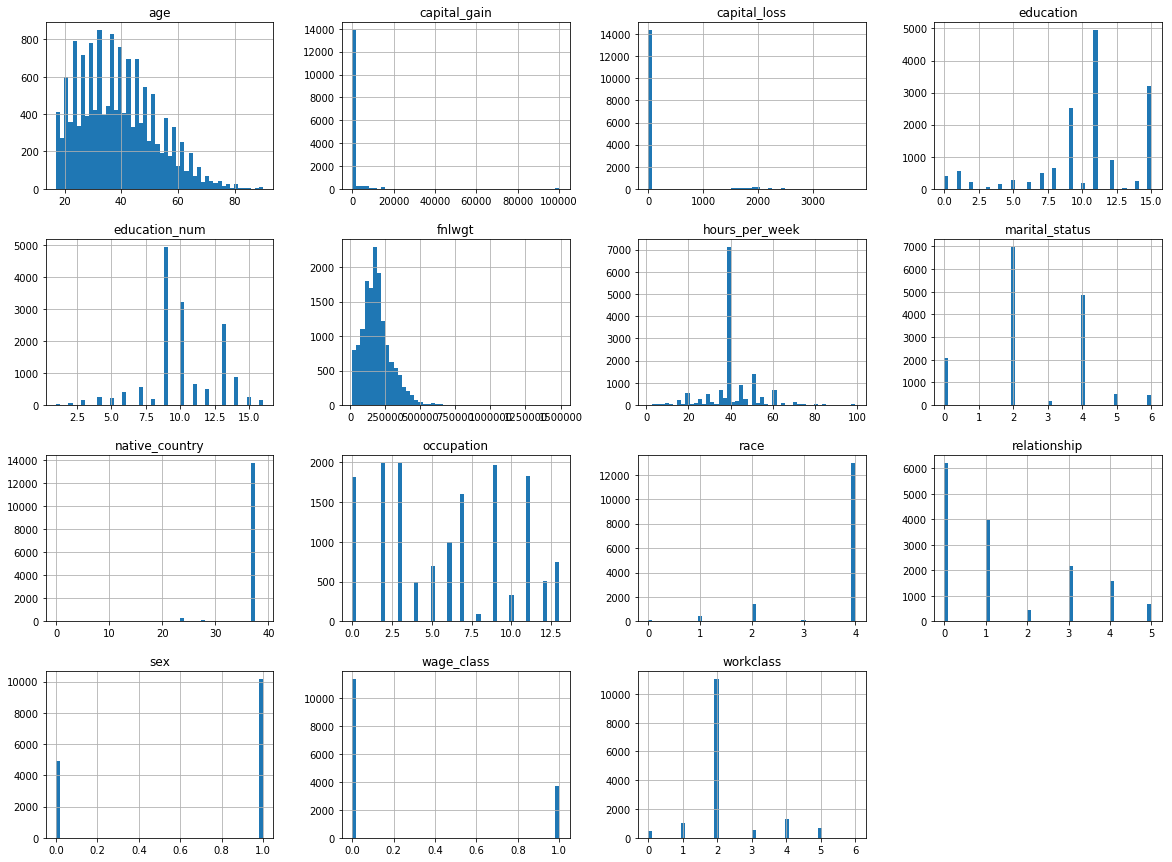

In [32]:
# Data Visualisation for Test Dataset for individual features
df_AdultData_test_set.hist(bins=50, figsize=(20,15))
plt.show()

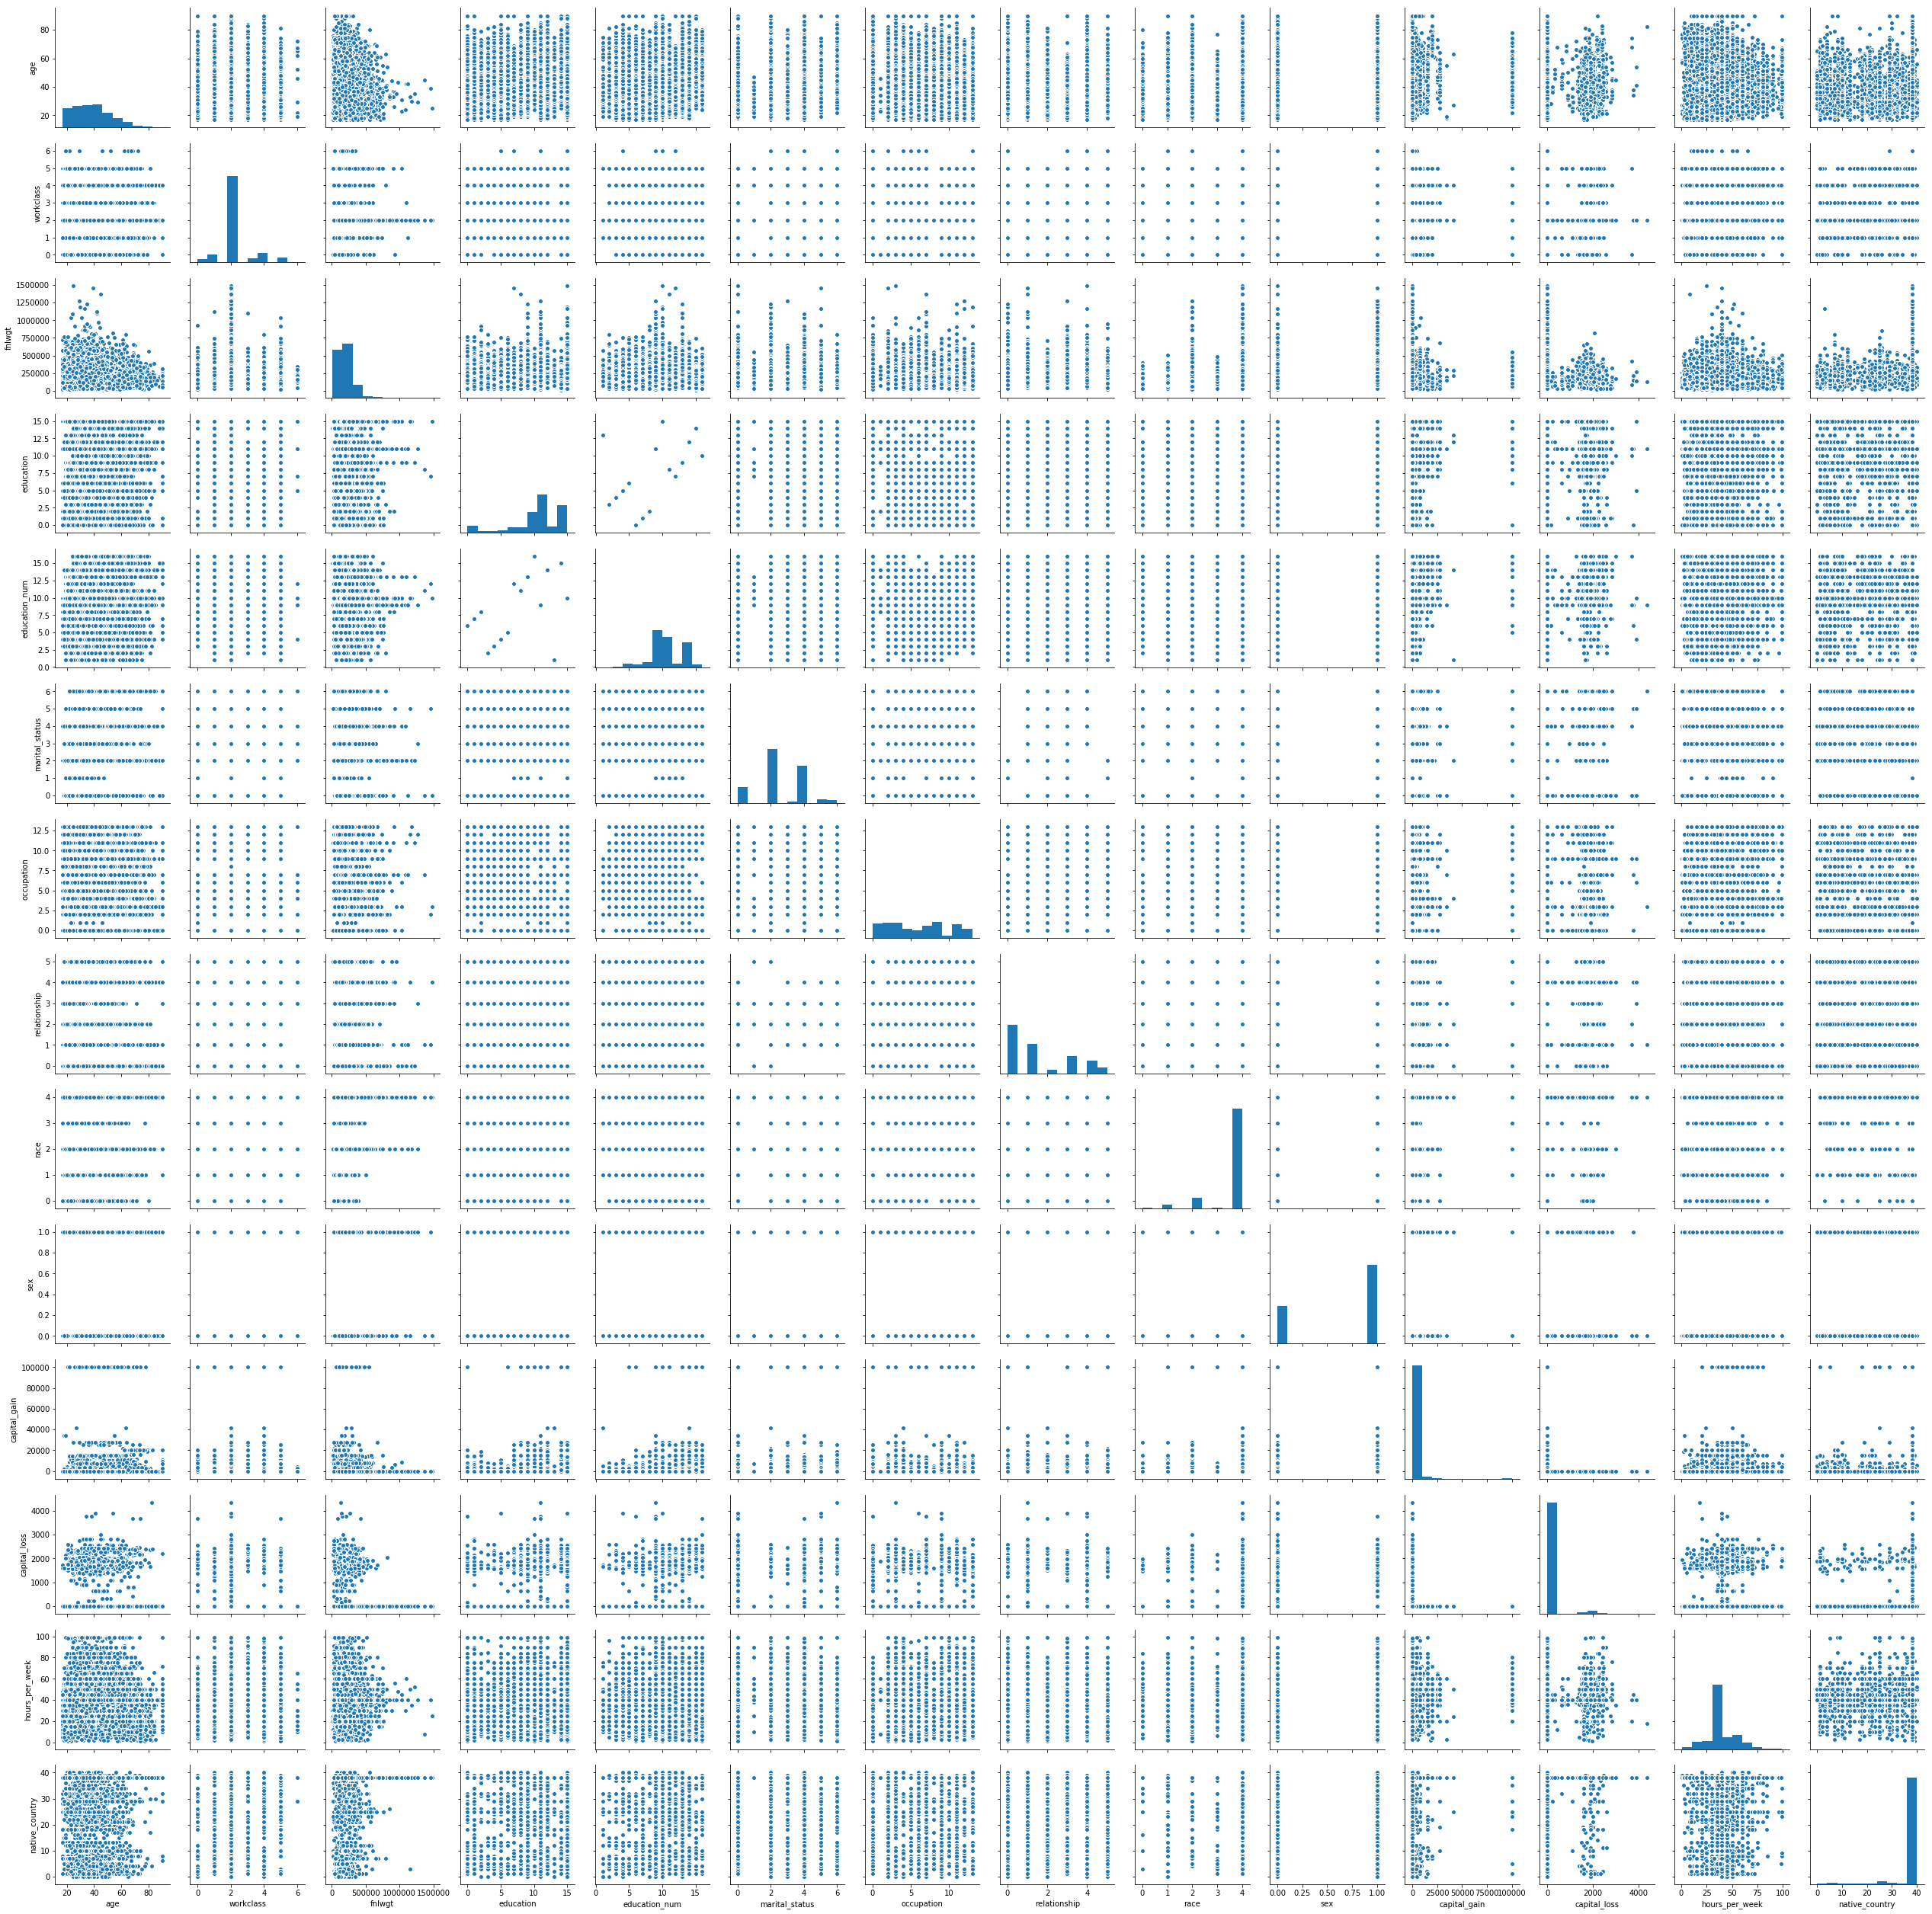

In [33]:
# Pair plot between features of dataset
sns.pairplot(df_AdultData_train_set.iloc[:,:-1])

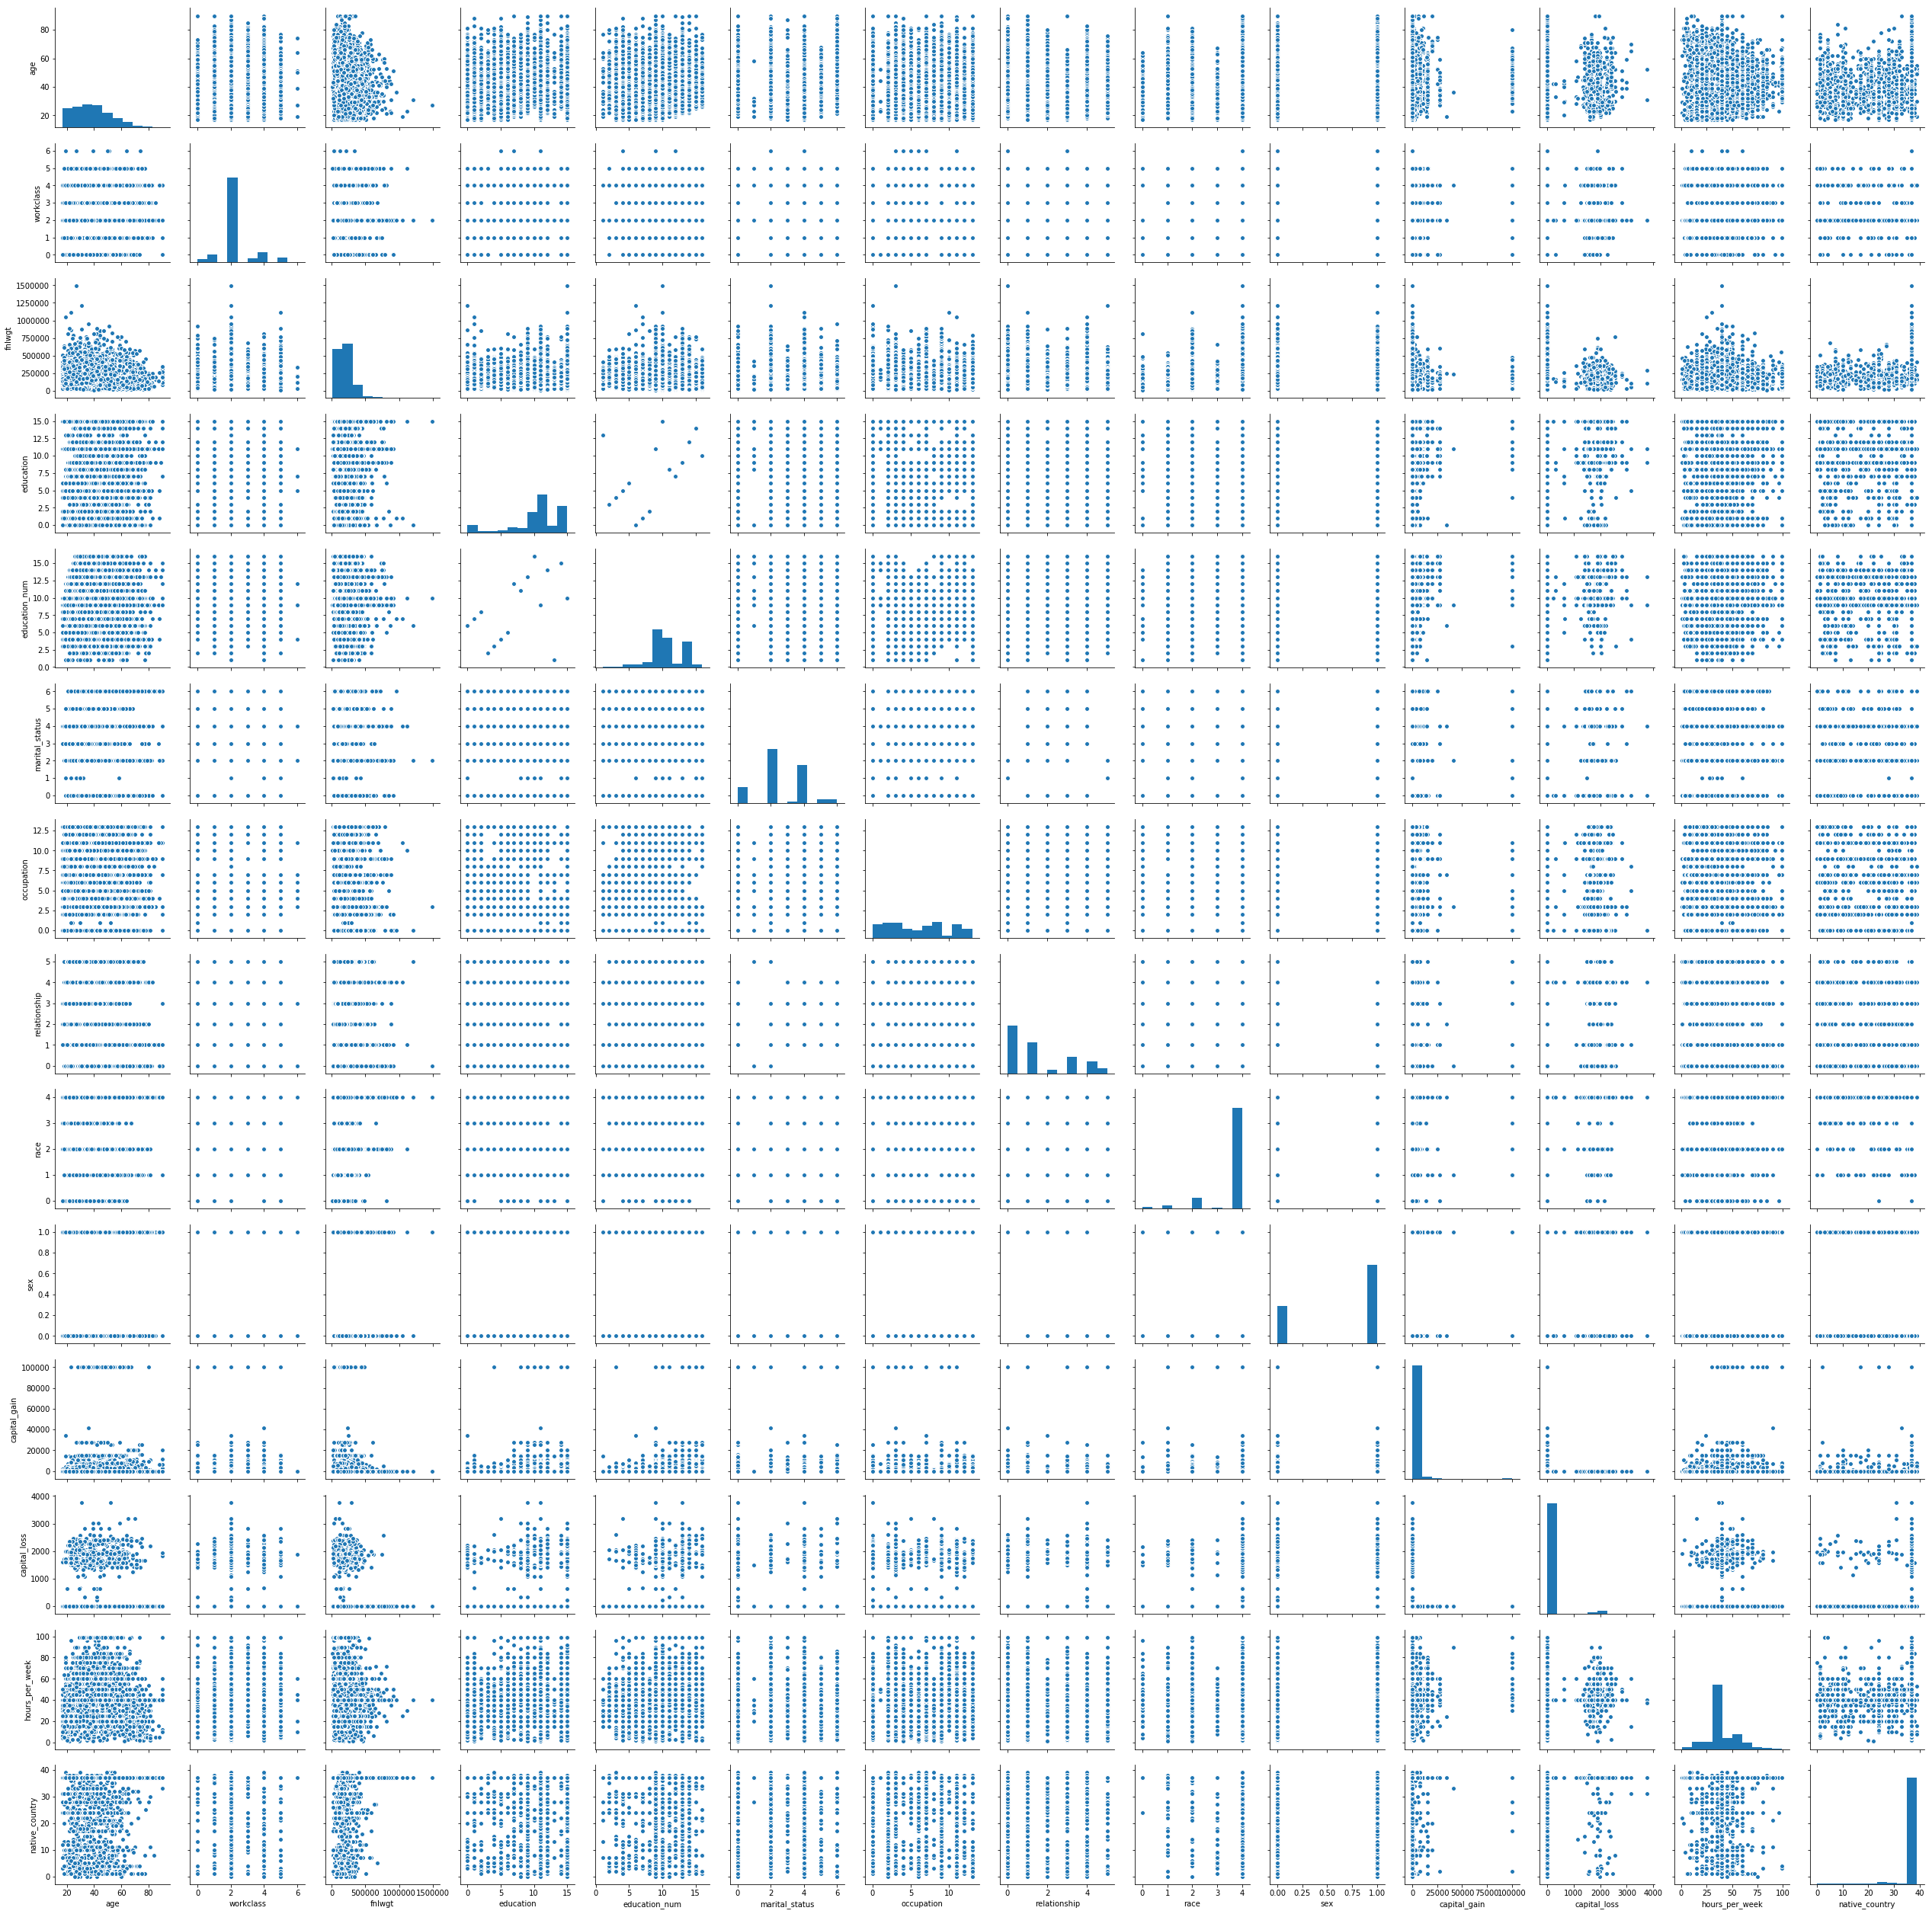

In [34]:
# Pair plot between features of test dataset
sns.pairplot(df_AdultData_test_set.iloc[:,:-1])

In [35]:
##Data Preparation for XGboost machine learning model
#Target and Feature variable from Training datatset
def getFeatureTargetVariable(df):
    df_Feature=df_AdultData_train_set.iloc[:,:-1]
    df_Target=df_AdultData_train_set.iloc[:,-1:]
    return df_Feature, df_Target

df_Feature , df_Target = getFeatureTargetVariable(df_AdultData_train_set)

In [36]:
#Feature variables from Training dataset
df_Feature.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38


In [37]:
#Target variables from Training dataset
df_Target.head(2)

,wage_class
0,0
1,0


In [38]:
##Split the Target and Feature variable into Train and Test dataset
#create Train & Test set from training dataste for machine learning algorithm

def createTrainTestSet(df):
    X_train,X_test , y_train, y_test = train_test_split(df_Feature, df_Target , test_size=0.3 , random_state=25, shuffle=True)
    return X_train,X_test , y_train, y_test

X_train,X_test , y_train, y_test =createTrainTestSet(df_AdultData_train_set)
print("Feature variables shape of train set :",X_train.shape)
print("Target variable shape of tarin set :",y_train.shape)
print("Feature variables shape of test set :",X_test.shape)
print("Target variables shape of test set :",y_test.shape)


Feature variables shape of train set : (21097, 14)
Target variable shape of tarin set : (21097, 1)
Feature variables shape of test set : (9042, 14)
Target variables shape of test set : (9042, 1)


In [42]:
#XGBoost Model
#Import XGboostClassifier from xgboost.sklearn

from xgboost.sklearn import XGBClassifier 

In [43]:
# Define parameter for XGBoost model
params = {'objective':'binary:logistic' , 'max_depth':7, 'learning_rate':1.0,'silent':True , 'booster':'gbtree',
         'n_estimators':400,  'random_state':15 ,'subsample':0.6,'gamma':0.9 , 'n_jobs':10}

In [44]:
# Method to apply XGBoost model

def XGBoost_Model(feature_variable, target_variable , params):
    XGB_model_clf= XGBClassifier(**params)
    xgb_model =XGB_model_clf.fit(X=feature_variable, y=np.ravel(target_variable))
    return xgb_model

# paramters for XGBoost model
feature_variable = X_train
target_variable=y_train
params
# Apply Feature, targte and params variable to XGboostmodel
xgboost_model = XGBoost_Model(X_train, y_train, params)

In [45]:
#Model Evaluation
#Probabilities and values for Target variable

def predict_target_variable_prob_values(feature_variable , model):
    y_pred=model.predict(feature_variable)
    y_pred_prob=model.predict_proba(feature_variable)
    return y_pred , y_pred_prob

y_pred=predict_target_variable_prob_values(X_train, xgboost_model)

y_pred_train=y_pred[0]
y_pred_prob_train=y_pred[1]
print("Training datset(df_AdultData_train_set) ")
print("Predicted target variable (first 5 values):",y_pred_train[0:5])
print("Predicted target variable probabilities (first 5 values):",y_pred_prob_train[0:5])

F:\data-science\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training datset(df_AdultData_train_set) 
Predicted target variable (first 5 values): [0 1 0 0 1]
Predicted target variable probabilities (first 5 values): [[9.9999899e-01 1.0012690e-06]
 [2.8017879e-02 9.7198212e-01]
 [9.9558610e-01 4.4138944e-03]
 [9.8523861e-01 1.4761408e-02]
 [8.2777143e-03 9.9172229e-01]]


In [46]:
#get Confusion matrix and Classification report based on actual and predicted target variable

#Confusion matrix based upon actual and predicted target variable
def get_confusion_matrix(actual_target_variable,predicted_target_variable):
    matrix = confusion_matrix(y_true=actual_target_variable , y_pred=predicted_target_variable)
    return matrix

#classification report based upon actual and predicted target variable
def get_classification_report(actual_target_variable,predicted_target_variable):
    report = classification_report(y_true=actual_target_variable , y_pred=predicted_target_variable)
    return report

actual_target_variable= y_train
predicted_target_variable= y_pred_train

print("Confusion matrix for training set :\n",get_confusion_matrix(actual_target_variable,predicted_target_variable), "\n")
print("Classification report for training set :\n",get_classification_report(actual_target_variable,predicted_target_variable))

Confusion matrix for training set :
 [[15833     8]
 [    6  5250]] 

Classification report for training set :
              precision    recall  f1-score   support

          0       1.00      1.00      1.00     15841
          1       1.00      1.00      1.00      5256

avg / total       1.00      1.00      1.00     21097



In [47]:
# Get precision , recall , acuuracy , and F1-score

#model acurracy score, precision score , recall score and F1-score
def get_model_eavluation_scores(actual_target_variable,predicted_target_variable ):
    acc_score= accuracy_score(y_true=actual_target_variable , y_pred=predicted_target_variable)
    prec_score=precision_score(y_true=actual_target_variable , y_pred=predicted_target_variable)
    recl_score= recall_score(y_true=actual_target_variable, y_pred=predicted_target_variable)
    f1score= f1_score(y_true= actual_target_variable, y_pred=predicted_target_variable)
    return acc_score , prec_score , recl_score , f1score

actual_target_variable=y_train
predicted_target_variable=y_pred_train

eval_scores=get_model_eavluation_scores(actual_target_variable , predicted_target_variable)
print("Model Accuracy score :", eval_scores[0] )
print("Model Precision score :", eval_scores[1] )
print("Model Recall score :", eval_scores[2] )
print("Model F-1 score :", eval_scores[3] )

Model Accuracy score : 0.9993363985400768
Model Precision score : 0.99847850893876
Model Recall score : 0.9988584474885844
Model F-1 score : 0.9986684420772304


In [48]:
#Feature Importance based upon Xgboost model
# align feature importance return by model and features

importance = pd.DataFrame.from_dict({'features':X_train.columns, 'importance': xgboost_model.feature_importances_})
importance=importance.sort_values(by='importance', ascending=False)
importance

,features,importance
2,fnlwgt,0.358
0,age,0.186
6,occupation,0.096
12,hours_per_week,0.094
3,education,0.061
4,education_num,0.053
1,workclass,0.044
7,relationship,0.032
5,marital_status,0.024
13,native_country,0.015


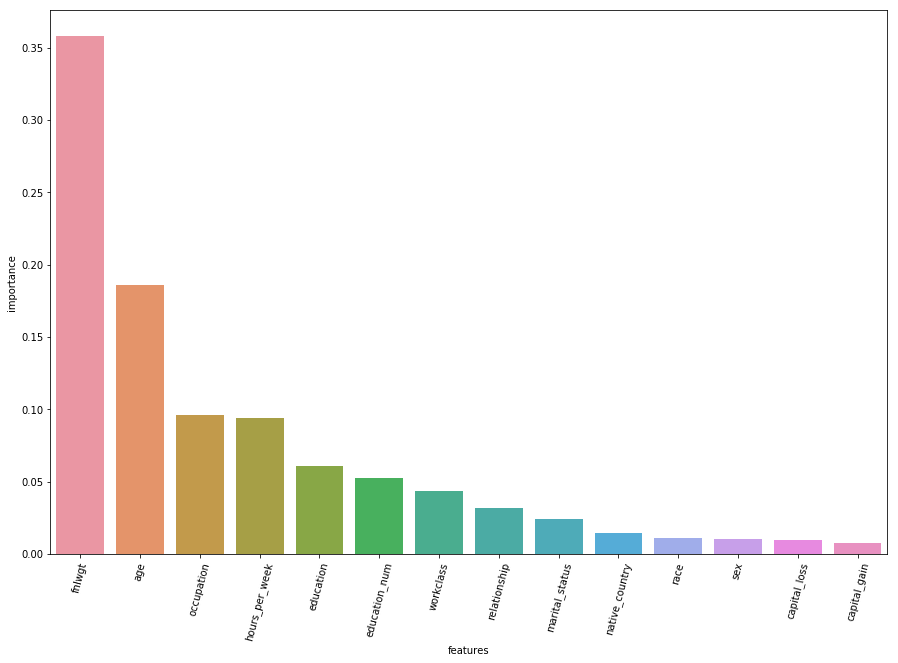

In [49]:
# Visualisation of feature importance
plt.figure(figsize=(15,10))
sns.barplot(importance.features, importance.importance)
plt.xticks(rotation=75)
plt.show()

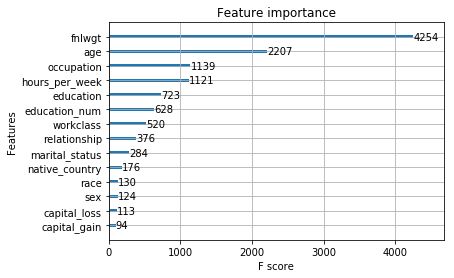

In [50]:
# Feature importance using Xgboost plot_importance
plot_importance(xgboost_model)

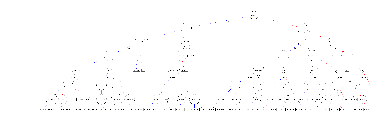

In [51]:
# Visulisation of single tree from xgboost model
import matplotlib.pyplot as plt

plot_tree(xgboost_model,num_trees=0)
plt.rcParams['figure.figsize'] = [600, 400]
plt.show()

In [52]:
##XGboost model evaluation using test variable returned by Training datatset via split method
# Feature test variable 
X_test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
27222,32,1,113838,15,10,2,10,0,4,1,0,0,99,38
13652,51,2,144084,11,9,4,6,3,4,0,0,0,40,38
30688,47,2,162494,15,10,0,11,4,4,0,0,0,45,38
25236,45,2,168598,2,8,2,0,5,2,0,3103,0,40,38
8504,49,2,128736,9,13,4,9,4,4,0,0,0,40,38


In [53]:
# Target test variable
y_test.head()

,wage_class
27222,0
13652,0
30688,1
25236,1
8504,0


In [54]:
# predict target variable form XGBoost model 

#apply feature set and model in to function predict_target_variable_prob_values()
print("Function-: predict_target_variable_prob_values() : ", predict_target_variable_prob_values.__doc__,"\n")

y_pred_new=predict_target_variable_prob_values(feature_variable=X_test , model=xgboost_model)
y_pred_test= y_pred_new[0]
y_pred_test_prob=y_pred_new[1]

print("Based upon test variable \n")
print("Predicted target variable (first 5 values):",y_pred_test[0:5])
print("Predicted target variable probabilities (first 5 values):\n", y_pred_test_prob[0:5])

Function-: predict_target_variable_prob_values() :  None 

Based upon test variable 

Predicted target variable (first 5 values): [0 0 0 1 0]
Predicted target variable probabilities (first 5 values):
 [[5.1059985e-01 4.8940012e-01]
 [9.9995017e-01 4.9848077e-05]
 [9.9942625e-01 5.7374570e-04]
 [8.9798570e-03 9.9102014e-01]
 [9.4636899e-01 5.3631030e-02]]


F:\data-science\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [55]:
# get Consfusion matrix and classification report for test variable 
actual_target_variable= y_test
predicted_target_variable= y_pred_test

print("Function-: get_confusion_matrix():" ,get_confusion_matrix.__doc__ )
print("Confusion matrix for training set :\n",get_confusion_matrix(actual_target_variable,predicted_target_variable), "\n")


print("Function-: get_classification_report():" ,get_classification_report.__doc__ )
print("Classification report for training set :\n",get_classification_report(actual_target_variable,predicted_target_variable))

Function-: get_confusion_matrix(): None
Confusion matrix for training set :
 [[6000  792]
 [ 844 1406]] 

Function-: get_classification_report(): None
Classification report for training set :
              precision    recall  f1-score   support

          0       0.88      0.88      0.88      6792
          1       0.64      0.62      0.63      2250

avg / total       0.82      0.82      0.82      9042



In [56]:
# Evalutation score for test variable
print(get_model_eavluation_scores.__doc__ )

actual_target_variable=y_test
predicted_target_variable=y_pred_test

# Apply fucntion to get evaluation scores
eval_test_scores=get_model_eavluation_scores(actual_target_variable , predicted_target_variable)
print("For test variable")
print("Model Accuracy score  : %.2f%%" % (eval_test_scores[0]*100))
print("Model Precision score : %.2f%%" %  (eval_test_scores[1] *100))
print("Model Recall score  : %.2f%%" %  (eval_test_scores[2]*100))
print("Model F-1 score : %.2f%%" %  (eval_test_scores[3]*100))

None
For test variable
Model Accuracy score  : 81.91%
Model Precision score : 63.97%
Model Recall score  : 62.49%
Model F-1 score : 63.22%


After evaluation, we can predict that model is able to predcit 82.03% accourate prediction for person earning wage more than 50K or less tha-eqaul to 50K

<b> Model Evalution using Test dataset </b>

In [57]:
df_AdultData_test_set.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,37,0


In [58]:
# Shape of data
df_AdultData_test_set.shape

(15055, 15)

In [59]:
#Select Feature and target variable 

X_feature= df_AdultData_test_set.iloc[:,:-1]
y_target= df_AdultData_test_set.iloc[:,-1:]

In [60]:
#Sample of feature data
X_feature.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,37
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,37


In [61]:
#Sample of target data
y_target.head(2)

,wage_class
0,0
1,0


In [63]:
# predict target variable 

y_target_predict = predict_target_variable_prob_values(feature_variable=X_feature , model=xgboost_model)
y_target_pred = y_target_predict[0]
y_target_pred_prob=y_target_predict[1]

print("Based upon test dataset \n")
print("Predicted target variable (first 5 values):",y_target_pred[0:5])
print("Predicted target variable probabilities (first 5 values):\n", y_target_pred_prob[0:5])

Based upon test dataset 

Predicted target variable (first 5 values): [0 0 0 1 0]
Predicted target variable probabilities (first 5 values):
 [[1.0000000e+00 3.2947742e-10]
 [9.8635727e-01 1.3642705e-02]
 [5.9207100e-01 4.0792900e-01]
 [5.5432320e-05 9.9994457e-01]
 [9.9999994e-01 6.7371708e-08]]


F:\data-science\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [64]:
# get confusion matix and classification report
actual_target_variable= y_target
predicted_target_variable= y_target_pred

print("Confusion matrix for training set :\n",get_confusion_matrix(actual_target_variable,predicted_target_variable), "\n")
print("Classification report for training set :\n",get_classification_report(actual_target_variable,predicted_target_variable))

Confusion matrix for training set :
 [[10365   990]
 [ 1596  2104]] 

Classification report for training set :
              precision    recall  f1-score   support

          0       0.87      0.91      0.89     11355
          1       0.68      0.57      0.62      3700

avg / total       0.82      0.83      0.82     15055



In [65]:
# Evaluation score for Test Dataset

print("Function-: get_model_eavluation_scores():",get_model_eavluation_scores.__doc__ )


# assign values 

actual_target_variable=y_target
predicted_target_variable=y_target_pred

# Apply fucntion to get evaluation scores
eval_test_scores=get_model_eavluation_scores(actual_target_variable , predicted_target_variable)
print("For test variable")
print("Model Accuracy score  : %.2f%%" % (eval_test_scores[0]*100))
print("Model Precision score : %.2f%%" %  (eval_test_scores[1] *100))
print("Model Recall score  : %.2f%%" %  (eval_test_scores[2]*100))
print("Model F-1 score : %.2f%%" %  (eval_test_scores[3]*100))

Function-: get_model_eavluation_scores(): None
For test variable
Model Accuracy score  : 82.82%
Model Precision score : 68.00%
Model Recall score  : 56.86%
Model F-1 score : 61.94%


##### <b>Cross Validation Score </b>

In [66]:
# import cross_val_score
from sklearn.model_selection import cross_val_score

In [67]:
scores = cross_val_score(estimator= xgboost_model,     # Model to test
                X= X_feature,  
                y = np.ravel(y_target),      # Target variable
                scoring = "accuracy",               # Scoring metric    
                cv=10)                              # Cross validation folds

print("Accuracy per fold: ")
print(scores)
print("Average accuracy: ", scores.mean())

F:\data-science\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
F:\data-science\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
F:\data-science\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
F:\data-science\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an erro

Accuracy per fold: 
[0.81938911 0.82669323 0.82735724 0.83200531 0.81606906 0.82192691
 0.83521595 0.8192691  0.84584718 0.81063123]
Average accuracy:  0.8254404309671612


F:\data-science\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [68]:
#After corss validation test, which result average accuracy of XGBoost model is 82% , which is eqaul to model accuarcy of test set of training dataset
#Thus after corss validation test, which result average accuracy of XGBoost model is 82% , which is equal to model accuarcy of test set of training dataset

In [69]:
#Predict wage based upon predicted target variable of test dataset
df_wage=pd.DataFrame(y_target_pred, columns=['wage_class'])
df_wage.wage_class.value_counts(normalize=True)

0   0.794
1   0.206
Name: wage_class, dtype: float64

#### Hence based upon predection we got 79.2% people were earning wage less than equal to 50K and rest 20.8% were earning wage more than 50K.